# ***Tải và giải nén file dataset.zip***

In [ ]:
!pip install --upgrade tflite
!pip install split-folders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
!gdown 'https://drive.google.com/uc?id=12frmJY0LYZ_mDKSecLX8PR-ST0uzTJBf' -O /content/dataset.zip

Downloading...
From: https://drive.google.com/uc?id=12frmJY0LYZ_mDKSecLX8PR-ST0uzTJBf
To: /content/dataset.zip
100% 251M/251M [00:01<00:00, 140MB/s]


In [ ]:
!unzip -o dataset.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: garbage_classification/paper/paper381.jpg  
  inflating: garbage_classification/paper/paper382.jpg  
  inflating: garbage_classification/paper/paper383.jpg  
  inflating: garbage_classification/paper/paper384.jpg  
  inflating: garbage_classification/paper/paper385.jpg  
  inflating: garbage_classification/paper/paper386.jpg  
  inflating: garbage_classification/paper/paper387.jpg  
  inflating: garbage_classification/paper/paper388.jpg  
  inflating: garbage_classification/paper/paper389.jpg  
  inflating: garbage_classification/paper/paper39.jpg  
  inflating: garbage_classification/paper/paper390.jpg  
  inflating: garbage_classification/paper/paper391.jpg  
  inflating: garbage_classification/paper/paper392.jpg  
  inflating: garbage_classification/paper/paper393.jpg  
  inflating: garbage_classification/paper/paper394.jpg  
  inflating: garbage_classification/paper/paper395.jpg  
  inflating: garbage_classificat

In [ ]:
!mv garbage_classification original_dataset

#***Cài đặt thư viện***

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
import sklearn
import shutil
import splitfolders
import numpy as np
import random
from collections import Counter
from tensorflow import keras
from PIL import Image as im
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#***Xoá các folder***

In [ ]:
# #Dùng nếu cần xoá folder
# shutil.rmtree('/content/original_dataset')
# shutil.rmtree('/content/dataset')
# shutil.rmtree('/content/sub_dataset')
# shutil.rmtree('/content/balanced_dataset')

#***Chia dataset thành 3 folder train, val, test***

In [ ]:
class_names = ["paper", "cardboard", "plastic", "metal", "trash", "battery", "shoes", "clothes", "green-glass", "brown-glass", "white-glass", "biological"]
categories = {0: 'paper', 1: 'cardboard', 2: 'plastic', 3: 'metal', 4: 'trash', 5: 'battery',
              6: 'shoes', 7: 'clothes', 8: 'green-glass', 9: 'brown-glass', 10: 'white-glass',
              11: 'biological'}

In [ ]:
#Nếu đã xử lý chia dataset thì không cần làm cái này
splitfolders.ratio("/content/original_dataset", output="/content/dataset", seed=42, ratio=(.6, .2, .2))

Copying files: 15515 files [00:04, 3735.76 files/s]


In [ ]:
def count_data(folder_path):
    class_counts = {}
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        file_count = len(os.listdir(class_path))
        class_counts[class_name] = file_count

    total_count = sum(class_counts.values())

    return class_counts, total_count

def print_data(folder_path):
    class_counts, total_count = count_data(folder_path)

    print('Total images:', total_count)

    for class_name, count in class_counts.items():
        print('Class:', class_name, '- Images:', count)

def visualize_data(folder_path):
    class_counts, _ = count_data(folder_path)
    fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size here
    ax.bar(class_counts.keys(), class_counts.values())
    ax.set_xlabel('Class Names', fontsize=14)
    ax.set_ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

***Dữ liệu từ original_dataset***

Total images: 15515
Class: paper - Images: 1050
Class: cardboard - Images: 891
Class: plastic - Images: 865
Class: metal - Images: 769
Class: trash - Images: 697
Class: battery - Images: 945
Class: shoes - Images: 1977
Class: clothes - Images: 5325
Class: green-glass - Images: 629
Class: brown-glass - Images: 607
Class: white-glass - Images: 775
Class: biological - Images: 985


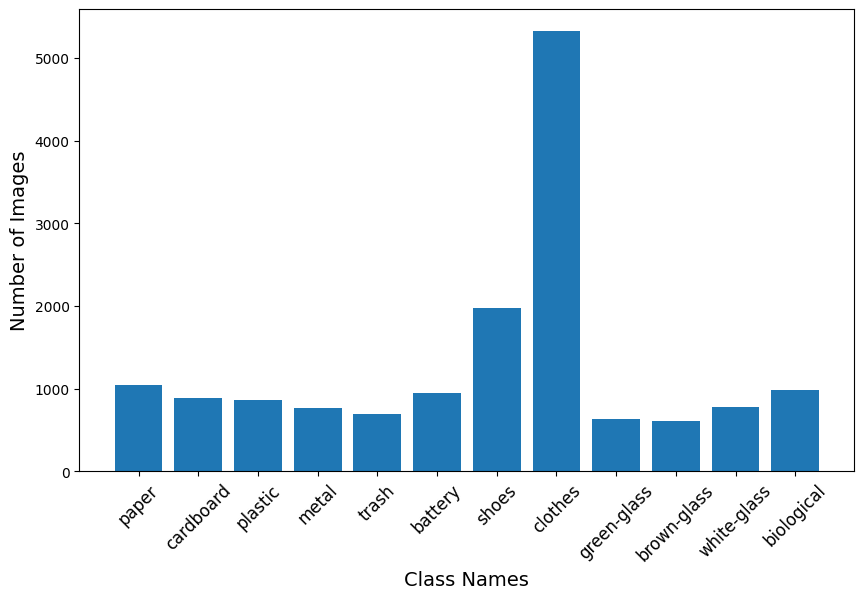

In [ ]:
#Visualize data gốc
print("***Dữ liệu từ original_dataset***\n")
print_data("/content/original_dataset")
#print(max(list(count_data("/content/original_dataset")[0].values())))
visualize_data("/content/original_dataset")

***Dữ liệu từ dataset tập train***

Total images: 9307
Class: paper - Images: 630
Class: cardboard - Images: 534
Class: plastic - Images: 519
Class: metal - Images: 461
Class: trash - Images: 418
Class: battery - Images: 567
Class: shoes - Images: 1186
Class: clothes - Images: 3195
Class: green-glass - Images: 377
Class: brown-glass - Images: 364
Class: white-glass - Images: 465
Class: biological - Images: 591


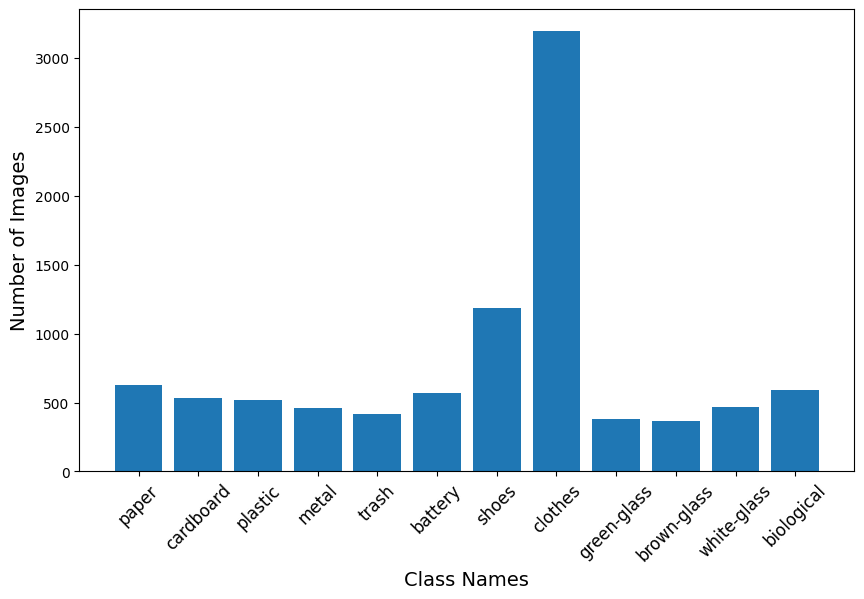

In [ ]:
print("***Dữ liệu từ dataset tập train***\n")
print_data("/content/dataset/train")
visualize_data("/content/dataset/train")

In [ ]:
# print("***Dữ liệu từ dataset tập val***\n")
# print_data("/content/dataset/val")
# visualize_data("/content/dataset/val")

Total images: 3100
Class: paper - Images: 210
Class: cardboard - Images: 178
Class: plastic - Images: 173
Class: metal - Images: 153
Class: trash - Images: 139
Class: battery - Images: 189
Class: shoes - Images: 395
Class: clothes - Images: 1065
Class: green-glass - Images: 125
Class: brown-glass - Images: 121
Class: white-glass - Images: 155
Class: biological - Images: 197


In [ ]:
# print("***Dữ liệu từ dataset tập test***\n")
# print_data("/content/dataset/test")
# visualize_data("/content/dataset/test")

Total images: 3108
Class: paper - Images: 210
Class: cardboard - Images: 179
Class: plastic - Images: 173
Class: metal - Images: 155
Class: trash - Images: 140
Class: battery - Images: 189
Class: shoes - Images: 396
Class: clothes - Images: 1065
Class: green-glass - Images: 127
Class: brown-glass - Images: 122
Class: white-glass - Images: 155
Class: biological - Images: 197


#***Tạo sub_dataset: sử dụng để chia nhỏ dataset***

In [ ]:
def create_sub_dataset(input_folder, output_folder, ratio):
    os.makedirs(output_folder, exist_ok=True)

    for data_type in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_folder, data_type), exist_ok=True)

        for class_name in class_names:
            class_input_folder = os.path.join(input_folder, data_type, class_name)
            class_output_folder = os.path.join(output_folder, data_type, class_name)
            os.makedirs(class_output_folder, exist_ok=True)

            class_files = os.listdir(class_input_folder)
            sub_dataset_size = int(len(class_files) * ratio)
            sub_dataset_files = random.sample(class_files, sub_dataset_size)

            for file_name in sub_dataset_files:
                src_path = os.path.join(class_input_folder, file_name)
                dst_path = os.path.join(class_output_folder, file_name)
                shutil.copyfile(src_path, dst_path)

In [ ]:
# shutil.rmtree('/content/sub_dataset')
create_sub_dataset('/content/dataset', '/content/sub_dataset', 1)

Kết luận: Dataset bị thiên vị, chưa cân bằng => Thực hiện cân bằng

In [ ]:
print_data("/content/sub_dataset/train")

Total images: 9307
Class: paper - Images: 630
Class: cardboard - Images: 534
Class: plastic - Images: 519
Class: metal - Images: 461
Class: trash - Images: 418
Class: battery - Images: 567
Class: shoes - Images: 1186
Class: clothes - Images: 3195
Class: green-glass - Images: 377
Class: brown-glass - Images: 364
Class: white-glass - Images: 465
Class: biological - Images: 591


In [ ]:
print_data("/content/sub_dataset/val")

Total images: 3100
Class: paper - Images: 210
Class: cardboard - Images: 178
Class: plastic - Images: 173
Class: metal - Images: 153
Class: trash - Images: 139
Class: battery - Images: 189
Class: shoes - Images: 395
Class: clothes - Images: 1065
Class: green-glass - Images: 125
Class: brown-glass - Images: 121
Class: white-glass - Images: 155
Class: biological - Images: 197


In [ ]:
print_data("/content/sub_dataset/test")

Total images: 3108
Class: paper - Images: 210
Class: cardboard - Images: 179
Class: plastic - Images: 173
Class: metal - Images: 155
Class: trash - Images: 140
Class: battery - Images: 189
Class: shoes - Images: 396
Class: clothes - Images: 1065
Class: green-glass - Images: 127
Class: brown-glass - Images: 122
Class: white-glass - Images: 155
Class: biological - Images: 197


#***Balance Data***

In [ ]:
def balance_data(input_folder, output_folder, remaining_folder):
    data_types=['train', 'val', 'test']
    os.makedirs(output_folder, exist_ok=True)

    for data_type in data_types:

        counts = Counter()
        for class_name in class_names:
            class_input_folder = os.path.join(input_folder, data_type, class_name)
            class_files = os.listdir(class_input_folder)
            counts[class_name] = len(class_files)

        min_samples = min(counts.values())

        os.makedirs(os.path.join(output_folder, data_type), exist_ok=True)

        for class_name in class_names:
            class_input_folder = os.path.join(input_folder, data_type, class_name)
            class_output_folder = os.path.join(output_folder, data_type, class_name)
            os.makedirs(class_output_folder, exist_ok=True)

            class_files = os.listdir(class_input_folder)
            sub_dataset_files = random.sample(class_files, min_samples)

            for file_name in sub_dataset_files:
                src_path = os.path.join(class_input_folder, file_name)
                dst_path = os.path.join(class_output_folder, file_name)
                shutil.copyfile(src_path, dst_path)

            remaining_files = list(set(class_files) - set(sub_dataset_files))

            remaining_output_folder = os.path.join(output_folder, remaining_folder, data_type, class_name)
            os.makedirs(remaining_output_folder, exist_ok=True)

            for file_name in remaining_files:
                src_path = os.path.join(class_input_folder, file_name)
                dst_path = os.path.join(remaining_output_folder, file_name)
                shutil.copyfile(src_path, dst_path)

In [ ]:
# shutil.rmtree('/content/balanced_dataset')
# shutil.rmtree('/content/remaining_dataset')
balance_data('/content/dataset', '/content/balanced_dataset','/content/remaining_dataset')

***Thực hiện cân bằng dữ liệu cho tập train***
Total images: 4368
Class: paper - Images: 364
Class: cardboard - Images: 364
Class: plastic - Images: 364
Class: metal - Images: 364
Class: trash - Images: 364
Class: battery - Images: 364
Class: shoes - Images: 364
Class: clothes - Images: 364
Class: green-glass - Images: 364
Class: brown-glass - Images: 364
Class: white-glass - Images: 364
Class: biological - Images: 364


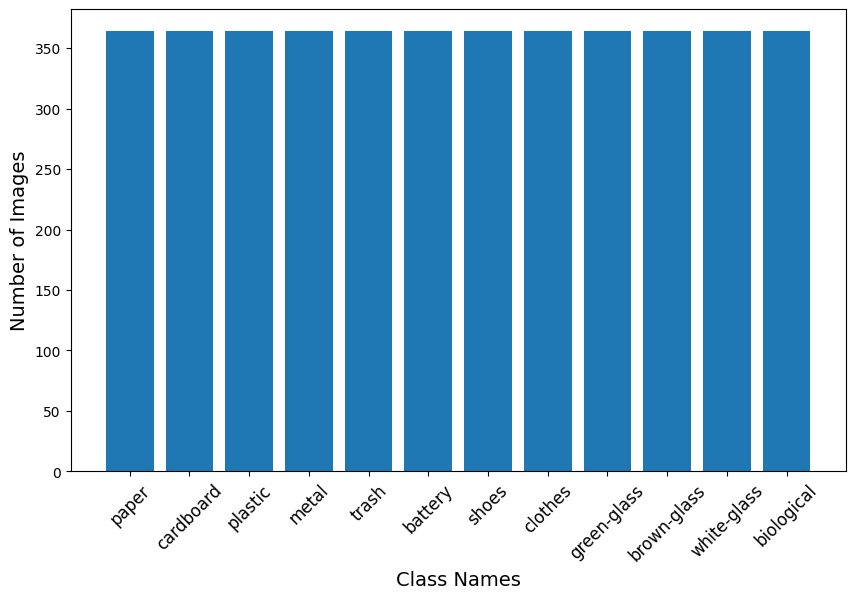

In [ ]:
print("***Thực hiện cân bằng dữ liệu cho tập train***")
print_data("/content/balanced_dataset/train")
visualize_data("/content/balanced_dataset/train")
# print("************************************")
# print("remaining_dataset/train")
# print_data("/content/remaining_dataset/train")
# visualize_data("/content/remaining_dataset/train")

In [ ]:
# print("***Thực hiện cân bằng dữ liệu cho tập val***")
# print_data("/content/balanced_dataset/val")
# visualize_data("/content/balanced_dataset/val")
# print("************************************")
# print("remaining_dataset/val")
# print_data("/content/remaining_dataset/val")
# visualize_data("/content/remaining_dataset/val")

In [ ]:
# print("***Thực hiện cân bằng dữ liệu cho tập test***")
# print_data("/content/balanced_dataset/test")
# visualize_data("/content/balanced_dataset/test")
# print("************************************")
# print("remaining_dataset/test")
# print_data("/content/remaining_dataset/test")
# visualize_data("/content/remaining_dataset/test")

#***Cài đặt thông số thành phần***

In [ ]:
data_dir = "/content/dataset"
img_height, img_width = 224, 224
batch_size = 64
AUTOTUNE = tf.data.AUTOTUNE

#***Load data***

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + "/train",
    labels='inferred',
    class_names=class_names,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
).cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + "/val",
    labels='inferred',
    class_names=class_names,
    image_size=(img_height, img_width),
    batch_size=batch_size
).cache().prefetch(buffer_size = AUTOTUNE)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + "/test",
    labels='inferred',
    class_names=class_names,
    image_size=(img_height, img_width),
    batch_size=batch_size
).cache().prefetch(buffer_size = AUTOTUNE)

Found 9307 files belonging to 12 classes.
Found 3100 files belonging to 12 classes.
Found 3108 files belonging to 12 classes.


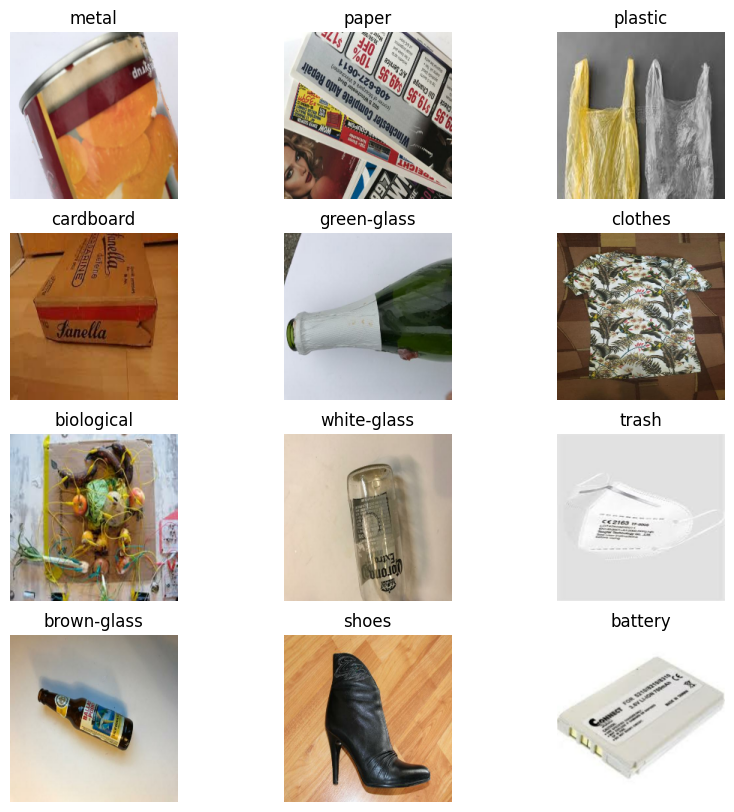

In [ ]:
plt.figure(figsize=(10, 10))

classes_plotted = []

for images, labels in train_ds:
    for i in range(images.shape[0]):
        if labels[i].numpy() not in classes_plotted:
            ax = plt.subplot(4, 3, len(classes_plotted) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

            classes_plotted.append(labels[i].numpy())

    if len(classes_plotted) == len(class_names):
        break

#***Thực hiện Data Augmentation***

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal', input_shape = (img_height, img_width, 3)),
    layers.RandomRotation(0.2, fill_mode = 'nearest'),
    layers.RandomZoom(0.1),
])

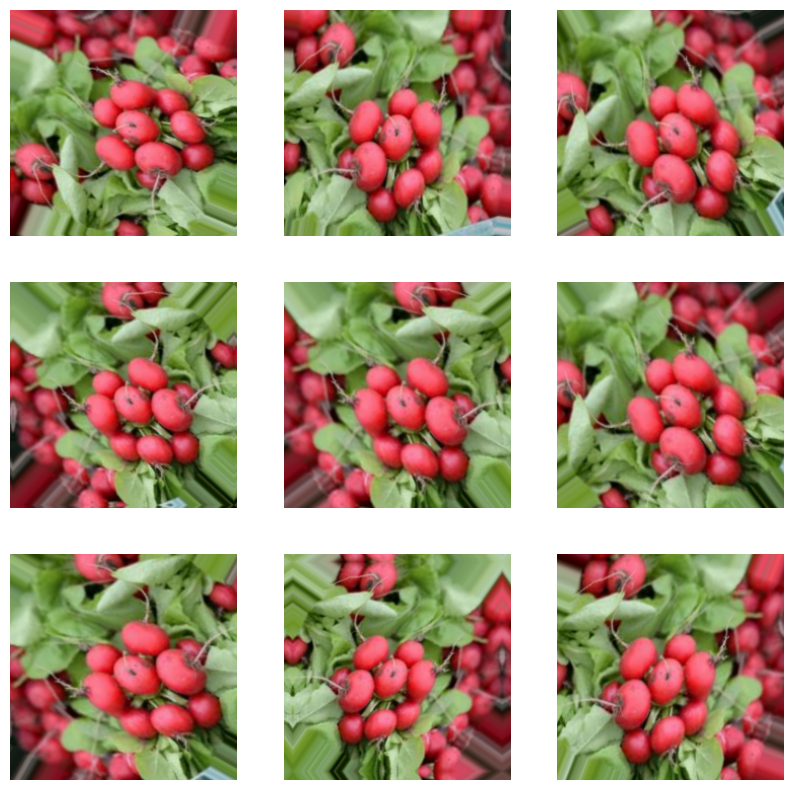

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

#***Xem qua một số kiến trúc***

In [ ]:
#Một số kiến trúc: Resnet
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = ResNet50(weights='imagenet')
resnet.summary()

In [ ]:
#Một số kiến trúc: VGG19
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights='imagenet')
vgg.summary()

In [ ]:
#Một số kiến trúc: InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(weights='imagenet')
inception.summary()

In [ ]:
#Một số kiến trúc: Xception
from tensorflow.keras.applications.xception import Xception
xception = Xception(weights='imagenet')
xception.summary()

In [ ]:
#pre-trained
from tensorflow.keras.applications import MobileNetV3Large
mobilenetv3 = MobileNetV3Large(include_top=False,
                                     weights='imagenet',
                                     input_shape=(img_height, img_width, 3))
mobilenetv3.summary()

12683000/12683000 [==============================] - 0s 0us/step
Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_1[0][0]']            
                                )                                                                 
                  

#***Build Model bằng MobileNet V3***


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# tắt trainable để tí nữa fine tuning
mobilenetv3.trainable = False
def mobilenetv3_preprocessing(img):
    return preprocess_input(img)

# Build model chính:
model = Sequential()
model.add(tf.keras.Input(shape=(img_height, img_width, 3)))
model.add(Lambda(mobilenetv3_preprocessing))
model.add(mobilenetv3)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(len(categories), activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d_3   (None, 960)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 12)                11532     
                                                                 
Total params: 3,007,884
Trainable params: 11,532
Non-trainable params: 2,996,352
_________________________________________________________________


In [ ]:
# model.load_weights('weights.h5')

#***Train Model***

69/69 [==============================] - 294s 4s/step - loss: 0.8216 - accuracy: 0.7521 - val_loss: 0.4665 - val_accuracy: 0.8561
Epoch 1
Train Accuracy: 0.7520604133605957
Validation Accuracy: 0.8560606241226196
Train Loss: 0.8215649127960205
Validation Loss: 0.46646252274513245
69/69 [==============================] - 252s 4s/step - loss: 0.4526 - accuracy: 0.8679 - val_loss: 0.3321 - val_accuracy: 0.8946
Epoch 2
Train Accuracy: 0.867902934551239
Validation Accuracy: 0.89462810754776
Train Loss: 0.45259127020835876
Validation Loss: 0.33208853006362915
69/69 [==============================] - 291s 4s/step - loss: 0.3508 - accuracy: 0.8940 - val_loss: 0.2858 - val_accuracy: 0.9036
Epoch 3
Train Accuracy: 0.894001841545105
Validation Accuracy: 0.9035812616348267
Train Loss: 0.35080912709236145
Validation Loss: 0.28579017519950867
69/69 [==============================] - 292s 4s/step - loss: 0.2941 - accuracy: 0.9119 - val_loss: 0.2605 - val_accuracy: 0.9125
Epoch 4
Train Accuracy: 0.911

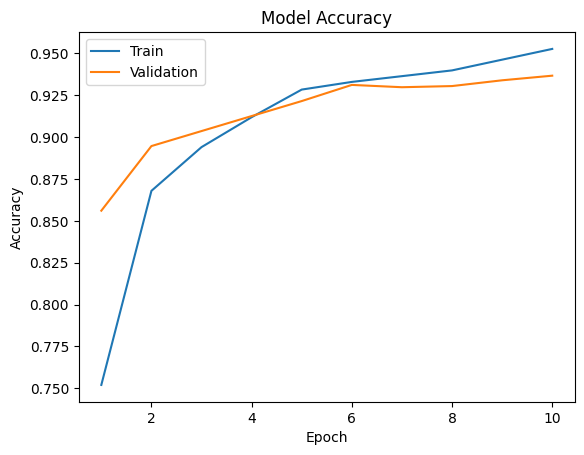

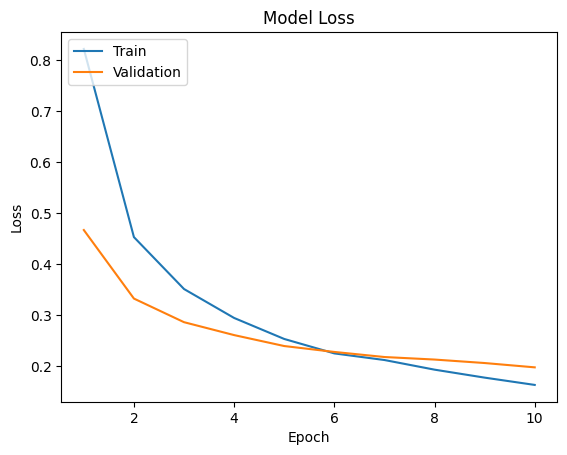

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

epochs = 10
fine_tuning_epochs = 3
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

for epoch in range(epochs):
    if epoch >= fine_tuning_epochs:
        mobilenetv3.trainable = True

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=1,
        callbacks=[early_stopping]
    )

    train_accuracy.append(history.history['accuracy'][0])
    val_accuracy.append(history.history['val_accuracy'][0])
    train_loss.append(history.history['loss'][0])
    val_loss.append(history.history['val_loss'][0])

    print("Epoch", epoch+1)
    print("Train Accuracy:", train_accuracy[-1])
    print("Validation Accuracy:", val_accuracy[-1])
    print("Train Loss:", train_loss[-1])
    print("Validation Loss:", val_loss[-1])

# Đồ thị Accuracy
plt.plot(range(1, len(train_accuracy)+1), train_accuracy)
plt.plot(range(1, len(val_accuracy)+1), val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Đồ thị Loss
plt.plot(range(1, len(train_loss)+1), train_loss)
plt.plot(range(1, len(val_loss)+1), val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_ds)

23/23 [==============================] - 66s 3s/step - loss: 0.2256 - accuracy: 0.9262


[0.22556012868881226, 0.9262295365333557]

In [ ]:
model.save_weights('mobilev3_weights.h5')

#***Trực quan hoá và đánh giá kết quả***

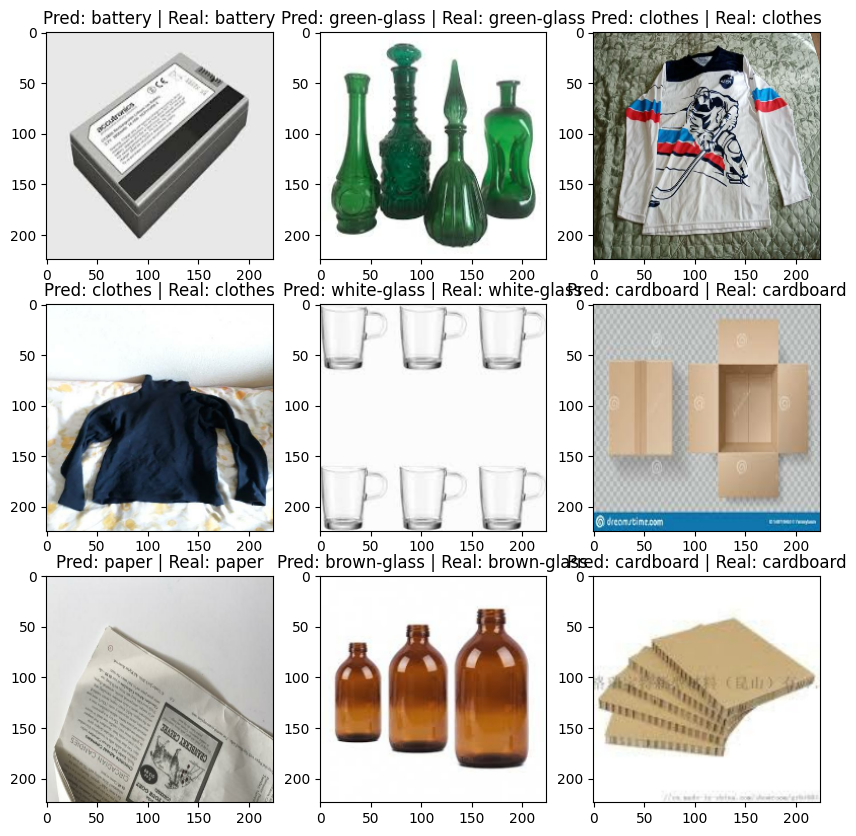

In [ ]:
import numpy
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications = model(images)
  # print(classifications)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = numpy.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
#Thử ảnh trên một trang web nào đó
import requests
from tensorflow.keras.preprocessing import image
from PIL import Image
from io import BytesIO

url = "https://hoanglongco.com/wp-content/uploads/2022/03/giay-carton-4-lop-0-357-1.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Load và preprocess ảnh
img = img.resize((img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
preprocessed_img_array = preprocess_input(img_array)

predictions = model.predict(preprocessed_img_array)
predicted_index = np.argmax(predictions[0])

print("Predicted Label: ", class_names[predicted_index])

1/1 [==============================] - 6s 6s/step
Predicted Label:  cardboard


23/23 [==============================] - 61s 3s/step


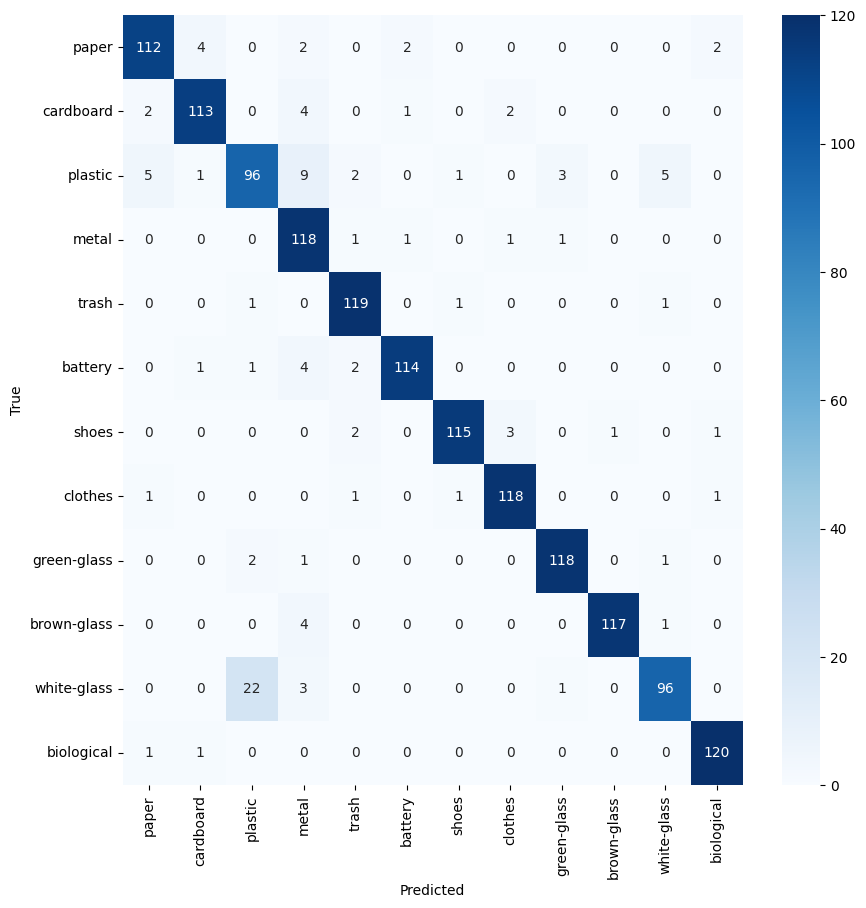

In [ ]:
#Biểu diễn ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.concatenate([y for x, y in test_ds])

y_pred = np.argmax(model.predict(test_ds), axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

       paper       0.93      0.92      0.92       122
   cardboard       0.94      0.93      0.93       122
     plastic       0.79      0.79      0.79       122
       metal       0.81      0.97      0.88       122
       trash       0.94      0.98      0.96       122
     battery       0.97      0.93      0.95       122
       shoes       0.97      0.94      0.96       122
     clothes       0.95      0.97      0.96       122
 green-glass       0.96      0.97      0.96       122
 brown-glass       0.99      0.96      0.97       122
 white-glass       0.92      0.79      0.85       122
  biological       0.97      0.98      0.98       122

    accuracy                           0.93      1464
   macro avg       0.93      0.93      0.93      1464
weighted avg       0.93      0.93      0.93      1464



In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
    f.write(tflite_model)

#***Đánh giá model.tflite***

In [ ]:
# Size
file_size_kb = os.path.getsize("/content/model.tflite") / 1024
print(f"Size of tflite model = {file_size_kb:.2f} KB")

Size of tflite model = 3225.66 KB


Xem lại mô hình TFLite:
https://drive.google.com/file/d/1N2uVuWbgskdBFKKRjLgMunE9Far7ob2t/view?usp=sharing

In [ ]:
# Load mô hình
interpreter = tf.lite.Interpreter(model_path="/content/model.tflite")
interpreter.allocate_tensors()
# Đọc mô hình
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# So sánh mô hình
tflite_predictions = []
test_labels = []

for images, labels in test_ds:
    for i in range(images.shape[0]):
        image = images[i:i+1].numpy()
        interpreter.set_tensor(input_details[0]['index'], image)
        interpreter.invoke()
        tflite_batch_predictions = interpreter.get_tensor(output_details[0]['index'])
        tflite_predictions.extend(tflite_batch_predictions)
    test_labels.extend(labels.numpy())

tflite_predictions = np.array(tflite_predictions)
test_labels = np.array(test_labels)
model_predictions = []
for images, _ in test_ds:
    batch_predictions = model.predict(images)
    model_predictions.extend(batch_predictions)

model_predictions = np.array(model_predictions)

accuracy_model = np.mean(np.argmax(model_predictions, axis=1) == test_labels)
accuracy_tflite = np.mean(np.argmax(tflite_predictions, axis=1) == test_labels)

print("Accuracy of Model without converting:", accuracy_model)
print("Accuracy of TFLite Model:", accuracy_tflite)
print("Percentage:", accuracy_model/accuracy_tflite)

2/2 [==============================] - 2s 1s/step
Accuracy of Model without converting: 0.9262295081967213
Accuracy of TFLite Model: 0.9262295081967213
Percentage: 1.0


In [ ]:
# Đường dẫn đến file remaining_dataset test mấy file chưa từng gặp
image_path = '/content/remaining_dataset/train/white-glass/white-glass110.jpg'

image = Image.open(image_path)
image = image.resize((img_height, img_width))
image = np.expand_dims(image, axis=0)

input_data = image.astype(np.float32)
output_data = interpreter.get_tensor(output_details[0]['index'])


predicted_class = np.argmax(output_data)
confidence = output_data[0, predicted_class]

# Xuất ra dự đoán
print("Predicted class:", class_names[predicted_class])
print("Confidence:", confidence)

Predicted class: white-glass
Confidence: 0.52625614
